In [ ]:
 # 1. 데이터 생성 및 준비

# 먼저 사이킷런(sklearn) 라이브러리에서 필요한 기능을 불러옵니다.
import sklearn  # 머신러닝 라이브러리
from sklearn.datasets import make_circles  # 원 모양의 데이터를 생성하는 함수

# 1000개의 샘플 데이터를 만들려고 합니다.
n_samples = 1000

# 원 모양의 데이터를 만듭니다.
# make_circles 함수는 두 개의 원 모양으로 데이터를 만들어줘요.
# noise는 데이터에 약간의 무작위성을 더해줍니다. (즉, 데이터를 좀 더 자연스럽게 만들기 위해 추가함)
# random_state는 랜덤성을 고정하기 위해 사용합니다. (항상 동일한 데이터가 생성되도록)
X, y = make_circles(n_samples, noise=0.03, random_state=42)

# 첫 번째 5개의 샘플 데이터를 출력해서 확인해봅니다.
print(f"First 5 samples of X:\n {X[:5]}")  # X의 첫 번째 5개의 샘플 출력
print(f"First 5 samples of y:\n {y[:5]}")  # y의 첫 번째 5개의 레이블(클래스) 출력


# 2. 데이터를 DataFrame에 담기

# pandas 라이브러리에서 DataFrame을 사용해 데이터를 표 형태로 만듭니다.
import pandas as pd

# X는 2개의 특징으로 이루어진 데이터입니다. X1은 첫 번째 특징, X2는 두 번째 특징을 의미합니다.
# y는 각 데이터가 어떤 클래스(0 또는 1)인지 나타내는 레이블입니다.
circles = pd.DataFrame({
    "X1": X[:, 0],  # X 데이터의 첫 번째 열(각 데이터의 첫 번째 값을 X1 열에 넣음)
    "X2": X[:, 1],  # X 데이터의 두 번째 열(각 데이터의 두 번째 값을 X2 열에 넣음)
    "label": y  # y 데이터는 각 데이터의 레이블(결과)을 label이라는 열로 담음
})

# DataFrame의 처음 10개의 행을 출력해서 확인해봅니다.
circles.head(10)  # head() 함수는 위에서부터 지정한 개수만큼 행을 보여줍니다.


# 3. 시각화 (데이터를 눈으로 확인하기)

# 데이터를 시각화하기 위해 matplotlib라는 그래프 라이브러리를 불러옵니다.
import matplotlib.pyplot as plt

# 데이터를 그래프에서 어떻게 보여줄지 설정합니다.
# plt.scatter 함수는 산점도(점 그래프)를 그릴 때 사용됩니다.
plt.scatter(
    x=X[:, 0],  # x축에는 X 데이터의 첫 번째 열(즉, X1 값)을 사용합니다.
    y=X[:, 1],  # y축에는 X 데이터의 두 번째 열(즉, X2 값)을 사용합니다.
    c=y,  # 각 점의 색깔은 y 값(레이블)에 따라 다르게 설정합니다. (클래스 0, 1에 따라 색이 다름)
    cmap=plt.cm.RdYlBu  # RdYlBu는 색상 맵으로, 빨간색(Red), 노란색(Yellow), 파란색(Blue)을 사용합니다.
)

# ; 기호는 주피터 노트북에서 불필요한 출력 결과를 숨기는 역할을 합니다.


# 4. 데이터 모양 확인하기 (입력과 출력의 크기)

# X와 y 데이터의 모양을 확인합니다.
# X의 모양은 (1000, 2), 즉 1000개의 샘플과 각 샘플에 2개의 특징이 있다는 뜻입니다.
# y의 모양은 (1000,), 즉 1000개의 샘플에 각각 하나의 레이블이 있다는 뜻입니다.
X.shape, y.shape


# 5. X와 y 데이터의 첫 번째 샘플 확인하기

# X 데이터의 첫 번째 샘플과 그에 대응하는 y 값을 확인합니다.
X_sample = X[0]  # X 데이터에서 첫 번째 샘플
y_sample = y[0]  # y 데이터에서 첫 번째 샘플의 레이블

# 첫 번째 샘플의 값과 그에 대응하는 y 값을 출력합니다.
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")

# 첫 번째 샘플의 모양(크기)을 확인합니다.
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")


In [25]:
# 1.2 Turn data into tensors and create train and test splits

import torch 
torch.__version__ # 파이토치 버전을 확인합니다.

type(X), X.dtype  # X 데이터의 타입과 dtype(데이터 타입)을 확인합니다.

# Turn data into tensors
# 데이터(X, y)를 텐서로 변환합니다.
# 텐서(tensor)는 파이토치에서 데이터를 처리할 때 사용하는 기본 자료형입니다.
X = torch.from_numpy(X).type(torch.float) # X 데이터를 NumPy 배열에서 텐서로 변환하고, 데이터 타입을 float으로 변환합니다.
y = torch.from_numpy(y).type(torch.float) # y 데이터도 마찬가지로 텐서로 변환하고, float 타입으로 변환합니다.

# 변환된 X와 y의 첫 5개의 샘플을 출력해봅니다.
X[:5], y[:5]  # X와 y의 첫 5개 데이터를 확인합니다.


# 데이터를 훈련용(train)과 테스트용(test)으로 나누기 위한 함수를 불러옵니다.
from sklearn.model_selection import train_test_split

# train_test_split 함수로 데이터를 훈련 세트와 테스트 세트로 나눕니다.
# X_train, X_test는 각각 훈련용과 테스트용 입력 데이터,
# y_train, y_test는 각각 훈련용과 테스트용 레이블 데이터를 의미합니다.
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2, # 0.2 = 20% of data will be test & 80% will be train
                                                    random_state=42)
     

In [26]:
# 2 Building a model 
# 2.1 setup device agnostic code so our code will run on an accelerator if there is one 

# construct a model by subclassing nn.module 
# designe a loss function and optimizer 
# create a training and test loop 

# Import PyTorch and nn
import torch
from torch import nn  # nn 모듈을 임포트해야 nn.Module, nn.Linear 등을 사용할 수 있습니다.

# 기기 설정
device = 'cuda' if torch.cuda.is_available() else 'cpu'  
# 만약 GPU를 사용할 수 있으면 'cuda'를 사용하고, 그렇지 않으면 'cpu'를 사용하라는 의미입니다.
# 이는 모델을 훈련하거나 예측할 때 사용할 기기를 설정하는 코드입니다.


# subclasses nn.module 
# create nn.liear layers that are capable of handing the shapes of our data 
# defines a forward method that outlines the forward pass 
# instantiate an instance of our model class and send it to the target device 

# 모델 설계 (nn.Module을 상속받아 모델 클래스를 만듭니다)
class CircleModelV0(nn.Module):  
    # nn.Module을 상속받아 CircleModelV0라는 모델을 정의합니다.
    
    def __init__(self):  # 모델 초기화 함수입니다.
        super().__init__()  # 부모 클래스(nn.Module)의 __init__ 메서드를 호출하여 상속된 초기화 작업을 수행합니다.
        
        # 첫 번째 선형 레이어 (Linear layer)를 정의합니다.
        # 입력 특징 (features)의 개수가 2개, 출력 특징의 개수가 5개로 설정되어 있습니다.
        # 이유: 데이터를 더 복잡하게 변형하기 위해 2개의 특징을 5개의 특징으로 확장합니다.
        self.layer_1 = nn.Linear(in_features=2, out_features=5)  
        
        # 두 번째 선형 레이어를 정의합니다.
        # 이 레이어는 5개의 입력 특징을 받아 1개의 출력 값을 생성합니다 (이 값은 예측된 분류 값입니다).
        self.layer_2 = nn.Linear(in_features=5, out_features=1)  
        
    def forward(self, x):  # forward 메서드는 모델이 데이터를 입력받아 처리하는 방법을 정의합니다.
        # 입력 데이터 x가 layer_1을 거쳐서 변환된 후, layer_2를 거쳐 최종 출력값을 반환합니다.
        return self.layer_2(self.layer_1(x))  
        # layer_1을 먼저 통과한 결과를 layer_2에 넣고 최종 결과를 반환합니다.

# 모델 인스턴스 생성 및 기기에 할당
model_0 = CircleModelV0().to(device)  
# CircleModelV0의 인스턴스를 생성하고, 이를 'device'로 설정한 기기(GPU 또는 CPU)로 보냅니다.

# 모델을 nn.Sequential()로 재구현 (더 간결하게 모델 정의)
model_0 = nn.Sequential(  
    nn.Linear(in_features=2, out_features=5),  # 첫 번째 레이어: 2개의 입력을 5개의 출력으로 변환
    nn.Linear(in_features=5, out_features=1)   # 두 번째 레이어: 5개의 입력을 1개의 출력으로 변환 (결과값)
).to(device)  
# nn.Sequential()는 여러 레이어를 순차적으로 쌓아서 모델을 간단하게 정의할 수 있는 방식입니다.
# 이 방식은 위에서 정의한 CircleModelV0와 동일한 구조를 더 간결하게 표현한 것입니다.
# 모델을 생성한 후 'device'로 기기에 할당합니다.

# 예측 수행
# 기본 성능이 얼마나 나쁜지 또는 좋은지 확인할 수 있습니다. 이를 통해 훈련 전후의 성능 변화를 추적할 수 있습니다.
# 모델이 제대로 동작하지 않는 경우, 훈련을 시작하기 전에 문제를 잡아낼 수 있기 때문입니다.
# 훈련 중간에도 torch.inference_mode()로 테스트 데이터를 통해 과적합 여부를 확인할 수 있습니다. 
# 최종적으로 평가할 때에도 이 모드를 사용해서 기울기 계산 없이 빠르게 예측값을 확인합니다.
with torch.inference_mode():  
    # inference_mode()는 모델이 기울기 계산을 하지 않고, 예측만 수행하도록 합니다 (메모리와 속도 효율을 높임).
    untrained_preds = model_0(X_test.to(device))  
    # X_test 데이터를 'device'로 이동시킨 후, 모델에 넣어 예측합니다.
    # 이 예측은 훈련되지 않은 상태에서 진행됩니다 (훈련 전 예측값을 확인하는 용도).

print(f"First 10 predictions:\n{torch.round(untrained_preds[:10])}")  # 첫 10개의 예측값을 반올림해서 출력합니다.
print(f"First 10 labels:\n{y_test[:10]}")  # 실제 첫 10개의 라벨 값을 출력합니다.


First 10 predictions:
tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]])
First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [27]:
# 2.1 Setup loss function and optimizer 
# For regression you might want MAE or MSE (mean absolute error or mean squared error).
# For classification you might want binary cross entropy or categorical cross entropy (cross entropy).

loss_fn = nn.BCEWithLogitsLoss() 
# BCEWithLogitsLoss: 이 함수는 모델의 예측값과 실제값 사이의 차이를 계산하는데 사용돼요. 
# 예측값을 0 또는 1로 만드는 이진 분류 문제에서 주로 쓰여요.
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1) # 이 코드 부분 상세하게 설명해줘. 

# Calculate accuracy / testing 100 exmaples 
# 옵티마이저는 모델의 가중치(weights)를 업데이트해 손실을 줄이도록 도와주는 역할을 해요.
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    # torch.eq()는 실제값(y_true)과 예측값(y_pred)을 비교해 맞는지 확인해요. 맞으면 True(1), 틀리면 False(0)를 반환해요.
    # sum(): 모델이 예측한 값들 중에서 얼마나 맞았는지를 모두 더해 계산해요.
    # item(): 텐서 값을 일반 숫자 값으로 변환해요.
    acc = (correct/len(y_pred))*100
    # 정확도를 계산하는 식이에요. 맞은 개수를 전체 예측한 개수로 나눠서 정확도를 계산하고, 퍼센트(%)로 변환해요.
    return acc # 계산된 정확도를 반환해요.




In [28]:
# 3 Train model 
# training loop with the following steps: 
# forward pass/ calculate the loss / optimizer zero grad / loss backward / optimizer step  

# 3.1 going from raw logits -> prediction probabilities -> prediction labels. 
# model outputs = raw logits 
# convert logits -> prediction probabilities by passing them to activation function 
# convert prediction probabilities to prediction labels by taking the argmax()

# View the first 5 outputs of the forward pass on the test data
model_0.eval()  
# 모델을 평가 모드로 전환합니다. 이 모드에서는 기울기 계산을 하지 않아요.

with torch.inference_mode():  
    #  **torch.inference_mode()**에서는 forward pass가 이루어집니다. 
    # 기울기 추적 없이 예측을 수행합니다. 속도와 메모리 효율성을 위해 사용됩니다.
    y_logits = model_0(X_test.to(device))[:5]  
    # 모델에 X_test 데이터를 넣어 예측을 수행한 후, 그 중 첫 5개의 예측 값을 가져옵니다.
    # 이 예측 값은 아직 'logits'이며, 확률로 변환되지 않은 상태입니다.
y_logits  
# 모델에서 나온 첫 5개의 logit 값을 출력합니다.
# 이거 forward pass 한게 아니라 예측 모드 쓴건데 뭐하는 거야.
# → 예측 모드에서는 forward pass가 이루어지며, 이 과정은 계산된 logits 값을 반환합니다. 
# forward pass 자체는 예측할 때에도 이루어지는 작업이에요.

# use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)  
# logit 값을 sigmoid 함수에 통과시켜 예측 확률로 변환합니다.
# sigmoid 함수는 logit 값을 0과 1 사이의 확률로 바꿔주는 활성화 함수입니다.
y_pred_probs  
# sigmoid 함수를 통과한 예측 확률을 출력합니다.

# find the prediction labels
y_preds = torch.round(y_pred_probs)  
# 예측 확률을 바탕으로 예측 레이블을 찾습니다.
# 확률이 0.5 이상이면 1로, 0.5 미만이면 0으로 반올림하여 이진 분류 레이블을 결정합니다.

# in full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))  
# 전체 과정을 한 줄로 작성한 코드입니다.
# 모델의 logit 값을 sigmoid 함수로 확률로 변환하고, 그 확률을 반올림하여 예측 레이블을 구합니다.
# 이 코드는 첫 5개의 X_test 데이터에 대해 수행한 것입니다.

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))  
# y_preds와 y_pred_labels가 동일한지 확인합니다.
# squeeze() 함수는 불필요한 차원을 제거하여 두 값의 크기를 맞춘 뒤, 동일한지 비교합니다.
# 이 과정은 코드를 간결하게 표현한 y_pred_labels와 별도로 계산한 y_preds가 동일한지 확인하는 것일 뿐입니다.

# Get rid of extra dimension
y_preds.squeeze()  
# squeeze() 함수는 텐서에서 차원이 1인 축을 제거합니다.
# 예를 들어, (5, 1) 모양의 텐서를 (5,) 모양으로 변경하여 불필요한 차원을 없애는 것이죠.
# 이렇게 하면 불필요한 차원을 제거하고, 나중에 데이터를 다루기 쉽게 만듭니다.

tensor([True, True, True, True, True])


tensor([0., 0., 1., 0., 1.])

In [29]:
# 3.2 building a training and testing loop 

torch.manual_seed(42)
torch.cuda.manual_seed(42)
# 이 코드는 랜덤 시드를 설정하여 항상 동일한 결과를 얻도록 해줍니다. 
# 무작위로 발생하는 값들을 고정합니다. `42`는 임의의 숫자일 뿐이며, 같은 시드를 사용하면 항상 같은 결과를 재현할 수 있습니다.

# set the number of epochs 
epochs = 100  
# 이 코드는 모델을 학습할 때 데이터를 몇 번 반복할지를 설정하는 부분입니다. 
# 여기서는 100번 반복하겠다는 의미입니다.

# put data to target device 
X_train, y_train = X_train.to(device), y_train.to(device) 
X_test, y_test = X_test.to(device), y_test.to(device)
# 훈련용 데이터(X_train, y_train)와 테스트용 데이터(X_test, y_test)를 
# 사용 중인 장치(예: CPU 또는 GPU)로 옮기는 코드입니다.

# build training and evaluation loop 
for epoch in range(epochs):  
    # 에포크는 전체 데이터셋을 한 번 훈련시키는 주기입니다. 이 코드에서는 총 100번을 반복합니다.

    ### training 
    model_0.train()  
    # 모델을 훈련 모드로 설정합니다. 이 모드에서는 기울기 계산이 활성화되고, 
    # Dropout과 같은 특정 레이어가 학습 모드로 동작하게 됩니다.

    # 1. forward pass 
    y_logits = model_0(X_train).squeeze()  
    # 훈련 데이터를 모델에 입력하여 예측 결과를 얻습니다. 
    # y_logits는 raw logits(활성화 함수에 통과하기 전의 값)입니다. `.squeeze()`는 차원이 1인 축을 제거합니다.
    
    y_pred = torch.round(torch.sigmoid(y_logits))  
    # logits 값을 시그모이드 활성화 함수로 변환하여 예측 확률로 바꾸고, 이를 반올림하여 0 또는 1로 변환합니다. 
    # 즉, logits -> 예측 확률 -> 예측 라벨(0 또는 1)로 변환하는 과정입니다.

    # 2. calculate loss/accuracy 
    # loss = loss_fn(torch.sigmoid(y_logits)), # nn.BCELoss expects prediction probabilities as input 
    loss = loss_fn(y_logits, y_train)  
    # 손실을 계산합니다. 여기서는 `BCEWithLogitsLoss`를 사용하기 때문에 
    # raw logits 값을 그대로 사용하여 손실을 계산합니다.
    
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)  
    # 정확도를 계산합니다. `y_train`(실제 값)과 `y_pred`(예측 값)를 비교하여 정확도를 계산합니다.

    # 3. Optimizer zero grad 
    optimizer.zero_grad()  
    # 옵티마이저가 이전에 계산한 기울기(gradients)를 초기화합니다. 
    # 이를 하지 않으면 이전에 계산된 기울기가 계속 남아 있게 되어 잘못된 학습이 일어날 수 있습니다.

    # 4. Loss backward (backpropagation)
    loss.backward()  
    # 역전파(backpropagation)를 통해 손실에 대한 기울기를 계산합니다. 
    # 모델의 모든 파라미터에 대해 기울기를 계산하고, 각 파라미터가 손실에 얼마나 기여했는지를 파악합니다.

    # 5. Optimizer step (Gradient Descent)
    optimizer.step()  
    # 옵티마이저가 기울기를 바탕으로 모델의 파라미터(가중치)를 업데이트하여 
    # 손실을 줄이는 방향으로 학습을 진행합니다.

    ### testing 
    model_0.eval()  
    # 모델을 평가 모드로 설정합니다. 평가 모드에서는 기울기 계산이 비활성화되고, 
    # 학습 중에만 동작해야 하는 레이어들(Dropout 등)이 비활성화됩니다.

    with torch.inference_mode():  
        # inference_mode()는 평가 시에 기울기 추적을 하지 않아 메모리 사용량을 줄이고, 
        # 속도를 높이기 위해 사용됩니다.
        
        # 1. forward pass 
        test_logits = model_0(X_test).squeeze()  
        # 테스트 데이터를 사용하여 예측 결과를 얻습니다.
        
        test_pred = torch.round(torch.sigmoid(test_logits))  
        # logits을 시그모이드 함수로 변환하고, 이를 반올림하여 0 또는 1로 변환합니다.

        # 2. calculate test loss/acc 
        test_loss = loss_fn(test_logits, y_test)  
        # 테스트 데이터에 대한 손실을 계산합니다.
        
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)  
        # 테스트 데이터에 대한 정확도를 계산합니다.

# Print out what's happenin'  
# 이 부분은 주기적으로(여기서는 10 에포크마다) 훈련 중에 무슨 일이 일어나고 있는지 출력하는 코드입니다. 
# 손실(Loss)과 정확도(Accuracy)를 주기적으로 출력해 학습이 잘 되고 있는지 확인합니다.

if epoch % 10 == 0:  
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")  
    # 10 에포크마다 훈련 중의 손실, 정확도, 테스트 데이터에 대한 손실, 정확도를 출력합니다. 
    # `{loss:.5f}`는 소수점 5자리까지 출력하는 형식입니다.


helper_functions.py already exists, skipping download


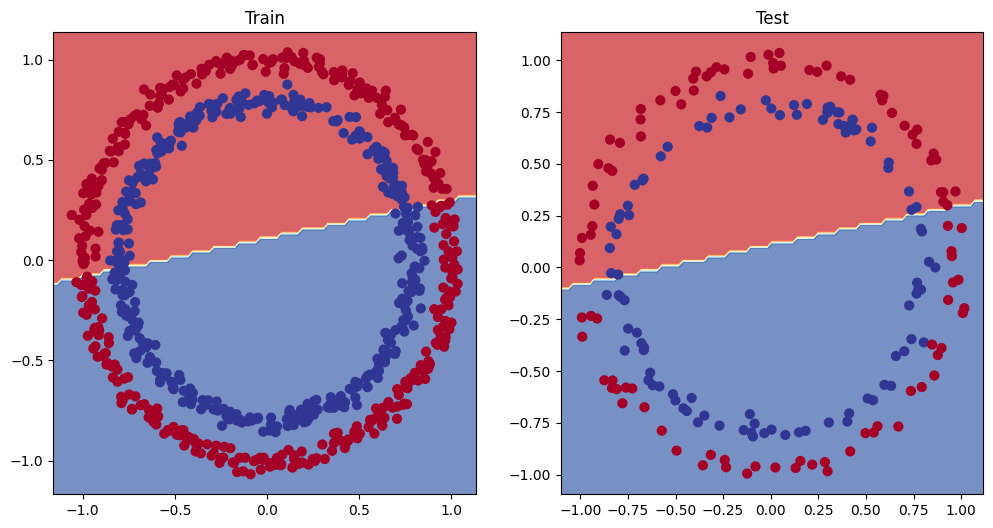

In [30]:
# 4 Make predictions and evaluate the model 

import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test) 

In [31]:
# improving a model (from a model perspective)

# Options are all values we (as machine learning engineers and data scientists) 
# can change, they are referred to as hyperparameters. 
# 하이퍼파라미터: 우리가 바꿀 수 있는 모델 설정 값들입니다. 학습률, 에포크 수 등이 있습니다.

X_train[:5], y_train[:5]  # 훈련 데이터와 그에 대응하는 레이블의 첫 5개 샘플을 출력합니다.

# Create a model 
# 새로운 모델 클래스 정의, 이 모델은 nn.Module을 상속받아 사용
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()  # 부모 클래스(nn.Module)의 __init__ 함수 호출
        # 첫 번째 레이어: 2개의 입력을 받아 10개의 출력으로 변환 (2 -> 10)
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        # 두 번째 레이어: 10개의 입력을 받아 10개의 출력으로 변환 (10 -> 10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        # 세 번째 레이어: 10개의 입력을 받아 1개의 출력으로 변환 (10 -> 1, 최종 예측값)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
    
    def forward(self, x):  # 모델이 데이터를 처리하는 과정 (Forward Pass)
        # x 데이터를 layer_1 -> layer_2 -> layer_3 순서로 처리하고 결과를 반환합니다.
        return self.layer_3(self.layer_2(self.layer_1(x)))

# 모델 인스턴스 생성 및 'device'(GPU 또는 CPU)로 전송
model_1 = CircleModelV1().to(device)

# Create a loss function 
# 손실 함수(BCEWithLogitsLoss): 시그모이드 함수가 포함된 손실 함수로, 이진 분류에 적합
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer 
# 옵티마이저(SGD): 확률적 경사 하강법을 사용하여 모델의 가중치를 업데이트
# lr: 학습률 (learning rate), 모델을 얼마나 빠르게 학습시킬지 결정
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

# write a training and evaluation loop for model_1
# 모델 훈련을 위한 학습 루프 작성

torch.manual_seed(42)  # 무작위성을 고정하기 위한 시드 설정
torch.cuda.manual_seed(42)

# train for longer 
epochs = 1000  # 모델을 1000번 반복하여 학습 (에포크 수를 증가시켜 학습 성능 개선 기대)

# put data on the target device 
# 데이터를 모델이 학습할 기기로 전송 (GPU나 CPU)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# 학습 루프 시작
for epoch in range(epochs):
    ### training (모델 훈련 과정)
    model_1.train()  # 모델을 훈련 모드로 설정
    
    # 1. forward pass 
    # 모델에 입력 데이터를 넣어 예측값을 생성 (로짓값)
    y_logits = model_1(X_train).squeeze()  # .squeeze()는 불필요한 차원을 제거
    y_pred = torch.round(torch.sigmoid(y_logits))  # 시그모이드 함수로 예측 확률을 계산하고 반올림하여 최종 예측값 생성

    # 2. calculate the loss/acc
    # 손실 계산: 모델 예측과 실제 값의 차이를 계산
    loss = loss_fn(y_logits, y_train)
    # 정확도 계산: 예측값과 실제 값의 정확도를 계산
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    # 3. optimizer zero grad 
    # 옵티마이저가 이전 기울기 값을 초기화 (누적되지 않도록)
    optimizer.zero_grad()

    # 4. loss backward (backpropagation)
    # 역전파를 통해 손실에 대한 기울기 계산
    loss.backward()

    # 5. optimizer step (gradient descent)
    # 옵티마이저가 기울기를 사용해 가중치를 업데이트 (경사 하강법)
    optimizer.step()

    ### testing (모델 테스트 과정)
    model_1.eval()  # 모델을 평가 모드로 전환 (기울기 계산 비활성화)
    with torch.inference_mode():  # 기울기 추적 비활성화 (예측만 수행)
        # 1. forward pass 
        test_logits = model_1(X_test).squeeze()  # 테스트 데이터를 사용해 예측값 생성
        test_pred = torch.round(torch.sigmoid(test_logits))  # 시그모이드 함수 적용 후 예측값 생성

        # 2. calculate loss
        # 테스트 손실 계산: 모델 예측값과 실제 테스트 값의 차이 계산
        test_loss = loss_fn(test_logits, y_test)
        # 테스트 정확도 계산
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    # print out what is happening (주기적으로 에포크마다 학습 상태를 출력)
    if epoch % 100 == 0:  # 100번째 에포크마다 상태 출력
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
        # 각 에포크에서 손실 값과 정확도 값을 출력


Epoch: 0 | Loss: 0.69396, Acc: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Acc: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Acc: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Acc: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Acc: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%


In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test) 

In [ ]:
# 5.1 Preparing data to see if our model can fit a straight line
# One way to troubleshoot to a larger problem is to test out a smaller problem.